In [2]:
%matplotlib inline
import pandas
import os
import collections

path = "data/train_set/"

def find_files(path, substring):
    files = os.listdir(path)
    return sorted(path + f for f in files if substring in f)

def parse_date(c):
    return pandas.to_datetime(c.astype(int), unit="ms")

def load_files(files, resample_interval=None):
    data = [pandas.read_csv(f,parse_dates=["ut_ms"], date_parser=parse_date, index_col=0) for f in files]
    if resample_interval:
        data = [d.resample(resample_interval).mean().interpolate() for d in data]
    return pandas.concat(data)

In [2]:
power_data = load_files(find_files(path, "power"), resample_interval="1H")
power_data.describe()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
count,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,...,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000
mean,0.127154,0.002083,0.175338,0.712616,0.000739,0.001244,0.002384,0.002431,0.201138,0.005294,...,0.000992,0.001536,0.134204,0.005781,0.298586,0.000528,0.000522,0.000745,0.043830,0.003374
std,0.040008,0.009370,0.001154,0.315908,0.000014,0.000582,0.022035,0.009196,0.053472,0.012205,...,0.000387,0.000030,0.078738,0.000108,0.172252,0.000078,0.000011,0.000014,0.143450,0.000067
min,0.001457,0.001411,0.034283,0.004949,0.000571,0.000613,0.000499,0.001462,0.001962,0.004884,...,0.000545,0.001179,0.002123,0.004438,0.004733,0.000494,0.000479,0.000703,0.006134,0.003156
25%,0.097210,0.001510,0.175089,0.454761,0.000731,0.000651,0.000566,0.001876,0.168678,0.005153,...,0.000581,0.001519,0.070790,0.005724,0.157124,0.000521,0.000516,0.000738,0.006676,0.003342
50%,0.121331,0.001529,0.175371,0.637399,0.000740,0.001142,0.000573,0.001899,0.198975,0.005215,...,0.000996,0.001539,0.133567,0.005793,0.304358,0.000528,0.000523,0.000747,0.006765,0.003383
75%,0.154242,0.001545,0.175606,0.972590,0.000747,0.001777,0.000578,0.001918,0.229161,0.005268,...,0.001319,0.001555,0.186210,0.005852,0.395997,0.000534,0.000528,0.000754,0.006837,0.003416
max,0.376517,0.267175,0.177803,2.175650,0.000857,0.006247,0.402500,0.306428,0.435523,1.965179,...,0.006263,0.001769,0.324555,0.006287,1.146090,0.010409,0.000598,0.000857,0.723399,0.003873


In [3]:
longterm_data = load_files(find_files(path, "ltdata"))
longterm_data.describe()

,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
count,2.061000e+03,2.061000e+03,2061.000000,2061.000000,2061.000000,2061.000000
mean,2.289354e+08,2.715726e+08,22.552500,590.958510,16.454731,18.068260
std,1.502282e+07,8.800971e+07,11.954585,78.516293,18.362685,20.537767
min,2.066449e+08,9.242161e+07,0.280288,492.116468,0.000000,0.000000
25%,2.139517e+08,2.012069e+08,12.117072,513.963102,0.000000,0.000000
50%,2.298804e+08,3.014157e+08,23.891058,578.492159,5.183333,11.100000
75%,2.438848e+08,3.493427e+08,33.886943,667.836542,34.516667,33.550000
max,2.492395e+08,3.744911e+08,39.859552,715.899348,55.450000,87.733333


In [4]:
event_data = load_files(find_files(path, "evtf"))
event_data[event_data.description.str.contains("UMBRA")].description.value_counts()

MAR_PENUMBRA_START    3577
MAR_PENUMBRA_END      3558
MAR_UMBRA_END         3532
MAR_UMBRA_START       3522
PHO_PENUMBRA_START      29
PHO_PENUMBRA_END        28
DEI_PENUMBRA_END        22
DEI_PENUMBRA_START      22
PHO_UMBRA_END            9
PHO_UMBRA_START          8
DEI_UMBRA_START          2
DEI_UMBRA_END            1
Name: description, dtype: int64

In [5]:
def get_event_ranges(event_data, event_prefix):
    current_start = None
    event_ranges = []
    for date, row in event_data[event_data.description.str.startswith(event_prefix)].iterrows():
        if row["description"].endswith("_START"):
            current_start = date
        elif current_start:
            event_ranges.append({"duration": date - current_start, 
                                 "start": current_start,
                                 "end": date})
            current_start = None
    return event_ranges

In [6]:
pandas.DataFrame(get_event_ranges(event_data, "MAR_PENUMBRA")).describe()

,duration,end,start
count,3557,3557,3557
unique,NaN,3557,3557
top,NaN,2010-10-01 13:40:15,2010-10-25 10:38:22
freq,NaN,1,1
first,NaN,2008-08-22 02:12:32,2008-08-22 02:08:22
last,NaN,2014-04-13 17:53:09,2014-04-13 17:21:01
mean,0 days 00:32:26.122012,NaN,NaN
std,0 days 00:12:01.515291,NaN,NaN
min,0 days 00:00:30,NaN,NaN
25%,0 days 00:24:17,NaN,NaN


In [7]:
pandas.DataFrame(get_event_ranges(event_data, "MAR_UMBRA")).describe()

,duration,end,start
count,3512,3512,3512
unique,NaN,3512,3512
top,NaN,2012-10-26 10:37:40,2012-10-11 06:51:05
freq,NaN,1,1
first,NaN,2008-08-22 02:11:15,2008-08-22 02:09:46
last,NaN,2014-04-13 17:53:05,2014-04-13 17:21:08
mean,0 days 00:32:12.287870,NaN,NaN
std,0 days 00:11:49.638575,NaN,NaN
min,0 days 00:01:13,NaN,NaN
25%,0 days 00:24:09.750000,NaN,NaN


In [8]:
def fill_events(prefix):
    col = "IN_" + prefix
    power_data[col] = 0
    
    for event in get_event_ranges(event_data, prefix):
        closest_start = power_data.index.searchsorted(event["start"])
        closest_end = power_data.index.searchsorted(event["end"])
        power_data.loc[closest_start:closest_end, col] = 1

fill_events("MAR_UMBRA")
power_data.describe()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882,IN_MAR_UMBRA
count,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,...,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000
mean,0.127154,0.002083,0.175338,0.712616,0.000739,0.001244,0.002384,0.002431,0.201138,0.005294,...,0.001536,0.134204,0.005781,0.298586,0.000528,0.000522,0.000745,0.043830,0.003374,0.036875
std,0.040008,0.009370,0.001154,0.315908,0.000014,0.000582,0.022035,0.009196,0.053472,0.012205,...,0.000030,0.078738,0.000108,0.172252,0.000078,0.000011,0.000014,0.143450,0.000067,0.188458
min,0.001457,0.001411,0.034283,0.004949,0.000571,0.000613,0.000499,0.001462,0.001962,0.004884,...,0.001179,0.002123,0.004438,0.004733,0.000494,0.000479,0.000703,0.006134,0.003156,0.000000
25%,0.097210,0.001510,0.175089,0.454761,0.000731,0.000651,0.000566,0.001876,0.168678,0.005153,...,0.001519,0.070790,0.005724,0.157124,0.000521,0.000516,0.000738,0.006676,0.003342,0.000000
50%,0.121331,0.001529,0.175371,0.637399,0.000740,0.001142,0.000573,0.001899,0.198975,0.005215,...,0.001539,0.133567,0.005793,0.304358,0.000528,0.000523,0.000747,0.006765,0.003383,0.000000
75%,0.154242,0.001545,0.175606,0.972590,0.000747,0.001777,0.000578,0.001918,0.229161,0.005268,...,0.001555,0.186210,0.005852,0.395997,0.000534,0.000528,0.000754,0.006837,0.003416,0.000000
max,0.376517,0.267175,0.177803,2.175650,0.000857,0.006247,0.402500,0.306428,0.435523,1.965179,...,0.001769,0.324555,0.006287,1.146090,0.010409,0.000598,0.000857,0.723399,0.003873,1.000000


In [9]:
col_counts = collections.Counter({col: power_data[col].mean() for col in power_data.columns}).most_common()
col_var = collections.Counter({col: power_data[col].std() for col in power_data.columns}).most_common()

In [10]:
downsampled = power_data.resample("1D").mean()
reup = downsampled.reindex(power_data.index, method="pad")

# compute MSE
((power_data - reup) ** 2).mean(axis=0).mean() ** 0.5

0.091776050421821381

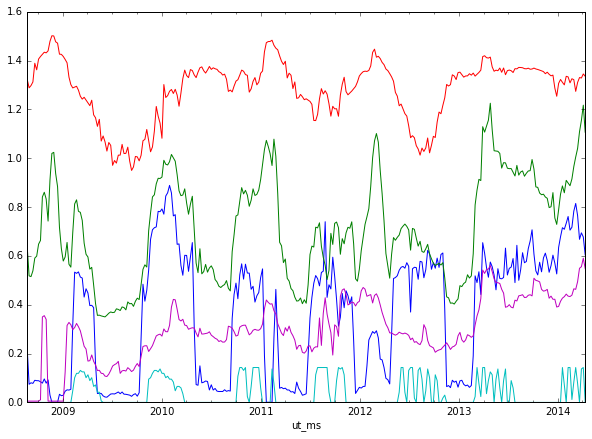

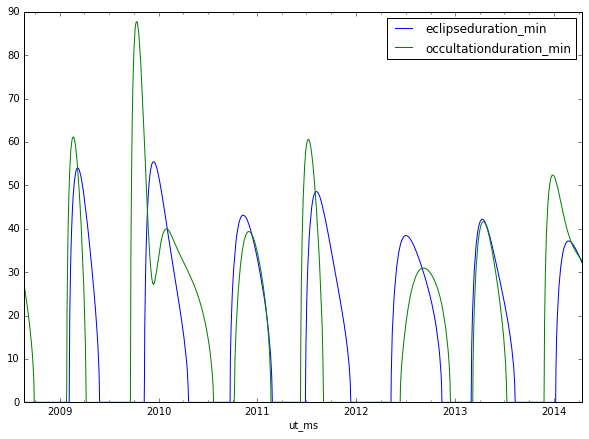

In [11]:
# for individual columns
for col, _ in col_var[0:5]:
   power_data[col].resample("7D").mean().plot(figsize=(10, 7), label=col)

# sum totals
# power_data.sum(axis=1).resample("1D").mean().plot(figsize=(10, 7))
longterm_data[["eclipseduration_min", "occultationduration_min"]].plot(figsize=(10, 7))

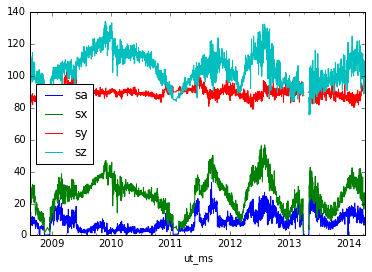

In [12]:
saa_data = load_files(find_files(path, "saaf"))
saa_data.describe()

saa_data.resample("1D").mean().plot()

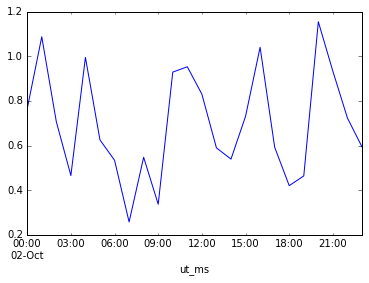

In [13]:
power_data['2008-10-02'].NPWD2451.plot()

In [ ]:
power_data.corr()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882,IN_MAR_UMBRA
NPWD2372,1.000000,0.005318,-0.008203,0.123107,-0.008811,0.166805,0.117327,0.005271,0.681628,-0.004718,...,0.025587,0.242503,-0.001790,0.318411,-0.001803,-0.037926,-0.006331,-0.112495,-0.005864,0.132065
NPWD2401,0.005318,1.000000,-0.165033,0.006382,-0.005639,-0.056598,-0.004894,0.905354,-0.003082,-0.000301,...,-0.005637,-0.098937,-0.002027,-0.097963,-0.001915,0.004647,-0.003257,-0.015329,-0.002170,0.021916
NPWD2402,-0.008203,-0.165033,1.000000,-0.007230,0.128977,0.055884,-0.006974,-0.170131,-0.018709,-0.000510,...,0.120250,0.009311,0.106076,0.003952,0.017794,0.126420,0.104558,-0.001577,0.114769,-0.002045
NPWD2451,0.123107,0.006382,-0.007230,1.000000,0.061317,0.127831,0.065330,0.010186,0.184394,0.002174,...,0.084915,0.290911,0.061852,0.346986,0.009282,0.027232,0.061835,-0.045657,0.060361,0.132792
NPWD2471,-0.008811,-0.005639,0.128977,0.061317,1.000000,0.245426,-0.009418,-0.000211,0.000307,0.003518,...,0.715387,0.037978,0.717602,0.004945,0.109564,0.772207,0.749668,0.008898,0.768424,-0.006105
NPWD2472,0.166805,-0.056598,0.055884,0.127831,0.245426,1.000000,0.020608,-0.055222,0.074676,0.008537,...,0.428267,0.061250,0.347224,0.320294,0.044667,0.314738,0.302596,-0.052014,0.320368,0.001251
NPWD2481,0.117327,-0.004894,-0.006974,0.065330,-0.009418,0.020608,1.000000,-0.004758,0.123221,-0.000584,...,-0.006066,0.056037,-0.008449,0.061809,-0.002976,-0.015236,-0.011297,-0.011124,-0.011921,0.045480
NPWD2482,0.005271,0.905354,-0.170131,0.010186,-0.000211,-0.055222,-0.004758,1.000000,-0.003942,-0.000159,...,-0.002761,-0.096547,0.005713,-0.095960,-0.000353,-0.001540,0.012640,-0.015038,0.004487,0.020271
NPWD2491,0.681628,-0.003082,-0.018709,0.184394,0.000307,0.074676,0.123221,-0.003942,1.000000,-0.002793,...,0.008672,0.220574,-0.004404,0.267424,0.003928,-0.025913,-0.005727,-0.098986,-0.004262,0.090474
NPWD2501,-0.004718,-0.000301,-0.000510,0.002174,0.003518,0.008537,-0.000584,-0.000159,-0.002793,1.000000,...,0.004054,0.003599,0.005300,0.002109,0.000590,0.003618,0.001743,-0.001810,0.002495,-0.001332


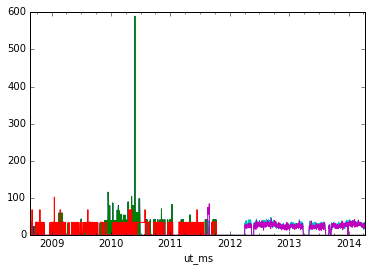

In [23]:
dmop_data = load_files(find_files(path, "dmop"))
# dmop_data = dmop_data[:1000]
dmop_data["subsystem"] = dmop_data.subsystem.str.replace(r"\..+", "")
dmop_data["dummy"] = 1
dmop_data = dmop_data.pivot_table(index=dmop_data.index, columns="subsystem", values="dummy").resample("1D").count()

column_variance = collections.Counter({col: dmop_data[col].std() for col in dmop_data.columns})
# print column_variance.most_common()
for col, _ in column_variance.most_common()[:5]:
    dmop_data[col].plot()